In [2]:
import requests
from transformers import pipeline
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Using Apple ticker as an example.
# Change the ticker symbol here to run for other companies
research_tickers = ['AAPL']

# Scraping news articles from Yahoo Finance

In [3]:
# Web scraping company news From Yahoo Finance
def get_news(ticker):
    news_source = "https://www.google.com/search?q=yahoo+finance+{}&tbm=nws".format(ticker)
    r = requests.get(news_source)
    soup = BeautifulSoup(r.text, 'html.parser')
    linktags = soup.find_all('a')
    hrefs = [link['href'] for link in linktags]
    return hrefs

# Getting article links in their raw format

In [4]:
# Article links in their raw format
article_links = {ticker:get_news(ticker) for ticker in research_tickers}
print(article_links)

{'AAPL': ['/?sa=X&ved=0ahUKEwjWkeGpjbP-AhUhqZUCHZRPAb8QOwgC', '/search?q=yahoo+finance+AAPL&tbm=nws&ie=UTF-8&gbv=1&sei=G2E-ZJaYCKHS1sQPlJ-F-As', '/search?q=yahoo+finance+AAPL&ie=UTF-8&source=lnms&sa=X&ved=0ahUKEwjWkeGpjbP-AhUhqZUCHZRPAb8Q_AUIBSgA', '/search?q=yahoo+finance+AAPL&ie=UTF-8&tbm=isch&source=lnms&sa=X&ved=0ahUKEwjWkeGpjbP-AhUhqZUCHZRPAb8Q_AUIBygC', '/search?q=yahoo+finance+AAPL&ie=UTF-8&tbm=vid&source=lnms&sa=X&ved=0ahUKEwjWkeGpjbP-AhUhqZUCHZRPAb8Q_AUICCgD', '/search?q=yahoo+finance+AAPL&ie=UTF-8&tbm=bks&source=lnms&sa=X&ved=0ahUKEwjWkeGpjbP-AhUhqZUCHZRPAb8Q_AUICSgE', '/advanced_search', '/search?q=yahoo+finance+AAPL&ie=UTF-8&tbm=nws&source=lnt&tbs=qdr:h&sa=X&ved=0ahUKEwjWkeGpjbP-AhUhqZUCHZRPAb8QpwUICw', '/search?q=yahoo+finance+AAPL&ie=UTF-8&tbm=nws&source=lnt&tbs=qdr:d&sa=X&ved=0ahUKEwjWkeGpjbP-AhUhqZUCHZRPAb8QpwUIDA', '/search?q=yahoo+finance+AAPL&ie=UTF-8&tbm=nws&source=lnt&tbs=qdr:w&sa=X&ved=0ahUKEwjWkeGpjbP-AhUhqZUCHZRPAb8QpwUIDQ', '/search?q=yahoo+finance+AAPL&ie=UTF-

In [53]:
import re

In [54]:
# Cleaning up and Formatting article URLS
unwanted_string_list = ['maps', 'policies', 'preferences', 'accounts', 'support']
def remove_unwanted_strings(urls, unwanted_string):
    new_urls = []
    for url in urls:
        if 'https://' in url and not any(exclude_word in url for exclude_word in unwanted_string):
            res = re.findall(r'(https?://\S+)', url)[0].split('&')[0]
            new_urls.append(res)
    return list(set(new_urls))

cleaned_urls = {ticker:remove_unwanted_strings(article_links[ticker], unwanted_string_list) for ticker in research_tickers}
# print(cleaned_urls)
cleanArr = [cleaned_urls]
for link in cleanArr:
    values = link.values()
    # print(values)
    for val in values:
        urlText = val
        for text in urlText:
            print(text)

https://finance.yahoo.com/news/apple-huge-buybacks-matter-much-101530165.html
https://finance.yahoo.com/news/tim-cooks-apple-is-coming-for-zuckerbergs-metaverse-093027794.html
https://finance.yahoo.com/news/tech-stocks-rally-as-investors-ask-when-do-things-start-looking-good-again-190001472.html
https://finance.yahoo.com/news/apple-40-plunge-pc-shipments-043700361.html
https://finance.yahoo.com/news/apple-launches-apple-pay-later-buy-now-pay-later-program-160846944.html
https://finance.yahoo.com/news/apples-india-sales-figure-hits-122619670.html
https://finance.yahoo.com/news/makes-apple-aapl-good-investment-112456785.html
https://finance.yahoo.com/news/the-first-quarter-of-the-year-sent-investors-back-to-the-future-morning-brief-093034637.html
https://finance.yahoo.com/news/apple-ceo-cook-meet-indian-113543537.html
https://www.google.com/search?q%3Dyahoo%2Bfinance%2BAAPL%26tbm%3Dnws%26pccc%3D1
https://finance.yahoo.com/news/apple-launches-high-yield-savings-account-with-goldman-in-pay

In [55]:
# Getting the full news article from each Link
def scrape_and_read_articles(URLs):
    NEWS_ARTICLES = []
    for url in URLs:
        r = requests.get(url)
        soup = BeautifulSoup(r.text, 'html.parser')
        paragraphs = soup.find_all('p')
        paragraph_text = [paragraph.text for paragraph in paragraphs]
        words = ' '.join(paragraph_text).split(' ')[:350]
        full_article = ' '.join(words)
        NEWS_ARTICLES.append(full_article)
    return NEWS_ARTICLES

In [ ]:
articles = {ticker:scrape_and_read_articles(cleaned_urls[ticker]) for ticker in research_tickers}
print(articles)

# Creating Ticker symbol article summary from news articles

In [ ]:
# Summarizing articles
def summarize(articles):
    summaries = []
    for article in articles:
        summary = query({"inputs": article})
        summaries.append(summary)
    return summaries

In [ ]:
# Creating an Object for each summary
ticker_summary = {ticker:summarize(articles[ticker]) for ticker in research_tickers}
ticker_summary['AAPL']

In [ ]:
# Importing the sentiment analysis model the Hugging Face BERT Financial model
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import pipeline
model = BertForSequenceClassification.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis",num_labels=3)
tokenizer = BertTokenizer.from_pretrained("ahmedrachid/FinancialBERT-Sentiment-Analysis")
sentiment = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)

## Creating sentiment analysis pipeline, getting scores and lables

In [ ]:
# Getting sentiment scores and labels
def sent_query(payload):
    response = requests.post(SENTI_MODEL_URL, headers=headers, json=payload)
    return response.json()

def get_sentiment(summaries):
    sentiments = []
    for summary in summaries:
        score = sentiment(summary[0]['summary_text'])
        score = sent_query(summary[0]['summary_text'])
        sentiments.append(score[0][0])
        # sentiments.append(score[0])
    return sentiments

In [ ]:
ticker_score = {ticker:get_sentiment(ticker_summary[ticker]) for ticker in research_tickers}
ticker_score

In [ ]:
def create_output_list(ticker_summary, scores, article_urls):
    output = []
    for ticker in research_tickers:
        for counter in range(len(ticker_summary[ticker])):
            desired_output = [
                ticker,
                ticker_summary[ticker][counter][0]['summary_text'],
                scores[ticker][counter]['label'],
                scores[ticker][counter]['score'],
                article_urls[ticker][counter]
            ]
            output.append(desired_output)
    return output

In [ ]:
full_summary = create_output_list(ticker_summary, ticker_score, cleaned_urls)
full_summary

In [ ]:
for summary in full_summary:
    print(f"{summary[1]} {summary[2]} {summary[3]} {summary[4]}")

In [ ]:
full_summary.insert(0, ['Ticker Symbol', 'Article Summary', 'Sentiment/Label', 'Confidence', 'Full article URL'])
full_summary

In [ ]:
# ADD OTHER METRICS AND THE CREATE PDF WITH FULL EQUITY RESEARCH REPORT
!pip install numpy
!pip install matplotlib
!pip install yahooquery

In [6]:
import numpy as np
from yahooquery import Ticker
import pandas as pd
import matplotlib.pyplot as plt

# Getting company metrics and market return comparison

In [7]:
# Getting Financial Data on the given Ticker symbol
company_ticker = Ticker('AAPL')
market_ticker = Ticker('^GSPC')
stock_priceDF = company_ticker.history(period='1d', start='2018-01-31', end='2023-02-01')
market_DF = market_ticker.history(period='1d', start='2018-01-31', end='2023-02-01')
stock_priceDF['log_returns'] = np.log(stock_priceDF['adjclose']/stock_priceDF['adjclose'].shift(1))
market_DF['log_returns'] = np.log(market_DF['adjclose']/market_DF['adjclose'].shift(1))
stock_priceDF = stock_priceDF.dropna()
market_DF = market_DF.dropna()
market_DF
print(stock_priceDF)

                         open        high         low       close     volume  \
symbol date                                                                    
AAPL   2018-02-01   41.792500   42.154999   41.689999   41.945000  188923200   
       2018-02-02   41.500000   41.700001   40.025002   40.125000  346375200   
       2018-02-05   39.775002   40.970001   39.000000   39.122501  290954000   
       2018-02-06   38.707500   40.930000   38.500000   40.757500  272975200   
       2018-02-07   40.772499   40.849998   39.767502   39.884998  206434400   
...                       ...         ...         ...         ...        ...   
       2023-01-25  140.889999  142.429993  138.809998  141.860001   65799300   
       2023-01-26  143.169998  144.250000  141.899994  143.960007   54105100   
       2023-01-27  143.160004  147.229996  143.080002  145.929993   70555800   
       2023-01-30  144.960007  145.550003  142.850006  143.000000   64015300   
       2023-01-31  142.699997  144.33999

In [8]:
combined = pd.concat([stock_priceDF, market_DF], axis=0, join='inner')

In [9]:
# Calculating the Covariance
covariance = (np.cov(stock_priceDF['log_returns'], market_DF['log_returns'])) * 250
covariance_with_market = covariance[0, 1]

In [10]:
market_variance = market_DF['log_returns'].var() * 250

In [11]:
beta_final = covariance_with_market / market_variance

In [12]:
# Calating the company's CAPM/Expected Return
company_capm = 0.025 + beta_final * 0.05

In [13]:
income_state = company_ticker.income_statement()

In [14]:
# Functions to clean up cost, profit, liquidity metrcis and separate these values into their own objects
def get_costs_(cost_array):
    costs = []
    for cost in cost_array:
        loot = float(cost)
        costs.append(loot)
    return costs

def get_year(income_state_years):
    years = []
    for year in income_state_years:
        str_time = year.strftime('%Y-%m-%d')
        years.append(str_time)
    return years

def get_net(ebit_array):
    ebits = []
    for earning in ebit_array:
        loot = float(earning)
        ebits.append(loot)
    return ebits

def get_ebit(earnings_arr):
    ebit = []
    for earned in earnings_arr:
        amnt = float(earned)
        ebit.append(amnt)
    return ebit

def get_revenue(revenue_arr):
    revenues = []
    for rev in revenue_arr:
        revenue = float(rev)
        revenues.append(revenue)
    return revenues

years = get_year(income_state['asOfDate'])
total_expense = get_costs_(income_state['TotalExpenses'])
net = get_net(income_state['NetIncome'])
ebit = get_ebit(income_state['EBIT'])
total_revenues = get_revenue(income_state['TotalRevenue'])

In [16]:

for profit in net:
    print(f"$ {profit:,.2f}")

$ 55,256,000,000.00
$ 57,411,000,000.00
$ 94,680,000,000.00
$ 99,803,000,000.00
$ 95,171,000,000.00


In [12]:
total_expense_dict = {year: cost for (year, cost) in zip(years, total_expense)}
net_income_dict = {year: income for (year, income) in zip(years, net)}

# Getting the company's Balance sheet

In [13]:
# Getting the company's Balance sheet
balance_sheet = company_ticker.balance_sheet()
cash_flow_statement = company_ticker.cash_flow(trailing=False)

In [14]:
def get_total_liabilities(liabilities):
    total_liabilities = []
    for liability in liabilities:
        value = float(liability)
        total_liabilities.append(value)
    return total_liabilities

def get_total_assets(assets):
    total_assets = []
    for asset in assets:
        value = float(asset)
        total_assets.append(value)
    return total_assets

def get_total_cash(cash):
    total_liquid = []
    for liquidity in cash:
        value = float(liquidity)
        total_liquid.append(value)
    return total_liquid

def get_current_assets(current_assets):
    total_current_assets = []
    for current_asset in current_assets:
        asset_value = float(current_asset)
        total_current_assets.append(asset_value)
    return total_current_assets

def get_current_liabilities(current_liabilities):
    total_current_liabilities = []
    for current_liability in current_liabilities:
        liability_val = float(current_liability)
        total_current_liabilities.append(liability_val)
    return total_current_liabilities

def ending_cash_balance(ending_cash):
    total_ending_cash = []
    for ending_cash in ending_cash:
        ending_balance = float(ending_cash)
        total_ending_cash.append(ending_balance)
    return total_ending_cash

def get_operating_cash_flow(cash_flow_arr):
    operating_flows = []
    for cash_flow in cash_flow_arr:
        flow_value = float(cash_flow)
        operating_flows.append(flow_value)
    return operating_flows

ending_cash_balance = ending_cash_balance(cash_flow_statement['EndCashPosition'])
total_liabilities = get_total_liabilities(balance_sheet['TotalLiabilitiesNetMinorityInterest'])
total_assets = get_total_assets(balance_sheet['TotalAssets'])
total_cash_equivalents = get_total_cash(balance_sheet['CashAndCashEquivalents'])
total_current_assets = get_current_assets(balance_sheet['CurrentAssets'])
total_get_current_liabilities = get_current_liabilities(balance_sheet['CurrentLiabilities'])
operating_cash_flows = get_operating_cash_flow(cash_flow_statement['OperatingCashFlow'])

# Calculating Financial Ratios

In [15]:
# Calculating Ratios
# Current ratio - company's ability to pay off its current liabilities 
current_ratios = {year: current_asset/current_liability for(year, current_asset, current_liability) in zip(years, total_current_assets, total_get_current_liabilities)}
# ROCE - Return on Capital Employed
roce = {year: year_ebit/(assets - curr_liabilities) for(year, year_ebit, assets, curr_liabilities) in zip(years, ebit, total_assets, total_get_current_liabilities)}
# Net Profit Margin
net_profit_margin = {year: (net_income/revenue)*100 for(year, net_income, revenue) in zip(years, net, total_revenues)}
# Operating Cash Flow ratio
operating_cash_flow_ratio = {year: operating_cash/current_liability for(year, operating_cash, current_liability) in zip(years, operating_cash_flows, total_get_current_liabilities)}
print(current_ratios)
print(roce)
print(operating_cash_flow_ratio)
print(net_profit_margin)

{'2019-09-30': 1.540125617208044, '2020-09-30': 1.3636044481554577, '2021-09-30': 1.0745531195957954, '2022-09-30': 0.8793560286267226}
{'2019-09-30': 0.2746157613037913, '2020-09-30': 0.3033831282952548, '2021-09-30': 0.48309913489209433, '2022-09-30': 0.6008713457059057}
{'2019-09-30': 0.6563782894114532, '2020-09-30': 0.7654660695308941, '2021-09-30': 0.8291135709788733, '2022-09-30': 0.7932810328479952}
{'2019-09-30': 21.238094505984456, '2020-09-30': 20.913611278072235, '2021-09-30': 25.88179335569424, '2022-09-30': 25.309640705199733, '2022-12-31': 24.557913179902823}


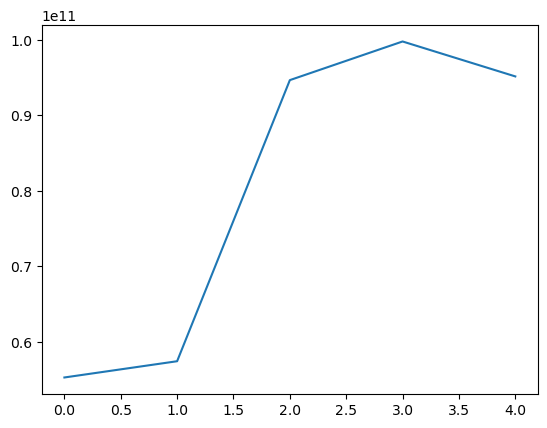

In [21]:
net_Df = pd.DataFrame(net)
plt.plot(net_Df)
plt.show()

In [42]:
newArr = []
newArr.append(years)
newArr

[['2019-09-30', '2020-09-30', '2021-09-30', '2022-09-30', '2022-12-31']]

In [43]:
newArr[0]

['2019-09-30', '2020-09-30', '2021-09-30', '2022-09-30', '2022-12-31']

In [49]:
capmArr = [company_capm]

In [50]:
round(capmArr[0], 2)*100

9.0